In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
file = "Output/Minimum_Wage_and_poverty_data.csv"

In [2]:
df = pd.read_csv(file)
df.head()

,State,Latitude,Longitude,Year,Minimum Wage,CPI Average,Wage equivalent in 2018,Poverty Rate
0,Alabama,32.806671,-86.79113,1968,1.6,34.78,11.55,NaN
1,Alabama,32.806671,-86.79113,1969,1.6,36.68,10.95,NaN
2,Alabama,32.806671,-86.79113,1970,1.6,38.83,10.36,NaN
3,Alabama,32.806671,-86.79113,1971,1.6,40.49,9.93,NaN
4,Alabama,32.806671,-86.79113,1972,1.6,41.82,9.62,NaN


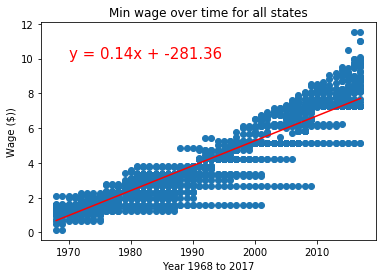

0.9375754920759788


In [3]:
#Scatter plot for all states min wages over 50 years

x_values = df["Year"]
y_values = df["Minimum Wage"]

# Min Wage over time for all states

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1970,10),fontsize=15,color="red")
plt.xlabel('Year 1968 to 2017')
plt.ylabel('Wage ($))')


plt.title("Min wage over time for all states")
# Saves an image of our chart so that we can view it in a folder
plt.savefig("./Images/min_wage_over_years_for_all_states.png")
plt.show()
print(rvalue)

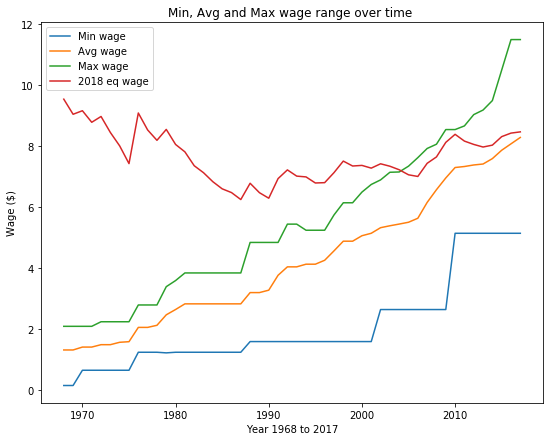

In [4]:
#What was the min, avg and max wage range over time
df_grp = df.groupby("Year")
max_wage_per_year = df_grp["Minimum Wage"].max()
min_wage_per_year = df_grp["Minimum Wage"].min()
mean_wage_per_year = df_grp["Minimum Wage"].mean()
mean_2018_wage = df_grp["Wage equivalent in 2018"].mean()
#plot the line graph
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(111)
ax.plot(df["Year"].unique(), min_wage_per_year, label='Min wage')
ax.plot(df["Year"].unique(), mean_wage_per_year, label='Avg wage')
ax.plot(df["Year"].unique(), max_wage_per_year, label='Max wage')
ax.plot(df["Year"].unique(), mean_2018_wage, label='2018 eq wage')
plt.xlabel("Year 1968 to 2017")
plt.ylabel("Wage ($)")
plt.title("Min, Avg and Max wage range over time ")
ax.legend()
# Saves an image of our chart so that we can view it in a folder
plt.savefig("Images/min_avg_max_2018_range.png")
plt.show()

In [5]:
#finding the 3 states that had max and min change in wages over 50 years
df_copy = df.copy()
#df_copy["Minimum Wage"] = df_copy["Minimum Wage"].totype(float)
data_1968 = df_copy[df_copy['Year'] == 1968]
data_2017 = df_copy[df_copy['Year'] == 2017]
df_1968 = pd.DataFrame(data_1968).reset_index()
df_2017 = pd.DataFrame(data_2017).reset_index()
#df_2017["wage diff"] = {}
min_wage_diff = []
for i in range(len(data_2017)):
    min_wage_diff.append(df_2017.loc[i, "Minimum Wage"] - df_1968.loc[i, "Minimum Wage"])
df_2017["min wage diff"] = min_wage_diff
df_2017.sort_values("min wage diff")

,index,State,Latitude,Longitude,Year,Minimum Wage,CPI Average,Wage equivalent in 2018,Poverty Rate,min wage diff
10,549,Georgia,33.040619,-83.643074,2017,5.15,245.12,5.26,15.1,3.55
50,2549,Wyoming,42.755966,-107.302490,2017,5.15,245.12,5.26,10.8,3.95
46,2349,Virginia,37.769337,-78.169968,2017,7.25,245.12,7.41,10.7,5.65
43,2199,Texas,31.054487,-97.563461,2017,7.25,245.12,7.41,14.7,5.65
42,2149,Tennessee,35.747845,-86.692345,2017,7.25,245.12,7.43,15.0,5.65
40,2049,South Carolina,33.856892,-80.945007,2017,7.25,245.12,7.43,15.4,5.65
24,1249,Mississippi,32.741646,-89.678696,2017,7.25,245.12,7.43,19.9,5.65
18,949,Louisiana,31.169546,-91.867805,2017,7.25,245.12,7.43,19.6,5.65
16,849,Kansas,38.526600,-96.726486,2017,7.25,245.12,7.41,11.9,5.65
15,799,Iowa,42.011539,-93.210526,2017,7.25,245.12,7.41,10.8,5.65


In [6]:
# state with maximum wage change Massachusetts, Washington, District of Columbia
# state with minimum wage change Georgia, Wyoming, Virginia
df_copy = pd.DataFrame(df[(df["Year"] >= 1998) & (df["Year"] <= 2017)])

georgia_data = df_copy[(df_copy["State"] == "Georgia")]
wyoming_data = df_copy[(df_copy["State"] == "Wyoming")]
virginia_data = df_copy[(df_copy["State"] == "Virginia")]

massachusetts_data = df_copy[(df_copy["State"] == "Massachusetts")]
Washington_data = df_copy[(df_copy["State"] == "Washington")]
dist_columbia_data = df_copy[(df_copy["State"] == "District of Columbia")]


In [7]:
#forming a table to find correlation between min wages and poverty rate for state with min and max changes
max_min_wage = []
#georgia_data
correlation1 = st.pearsonr(georgia_data["Minimum Wage"], georgia_data["Poverty Rate"])
max_min_wage.append(["Georgia", "Min Change", 3.55, georgia_data["Poverty Rate"].mean(), round(correlation1[0],2) ])
georgia_data
#wyoming
correlation1 = st.pearsonr(wyoming_data["Minimum Wage"], wyoming_data["Poverty Rate"])
max_min_wage.append(["Wyoming", "Min Change", 3.95, wyoming_data["Poverty Rate"].mean(), round(correlation1[0],2) ])
#virginia
correlation1 = st.pearsonr(virginia_data["Minimum Wage"], virginia_data["Poverty Rate"])
max_min_wage.append(["Virginia", "Min Change", 5.65, virginia_data["Poverty Rate"].mean(), round(correlation1[0],2) ])

#max states
#massachusetts
correlation1 = st.pearsonr(massachusetts_data["Minimum Wage"], massachusetts_data["Poverty Rate"])
max_min_wage.append(["Massachusetts", "Max Change", 9.40, massachusetts_data["Poverty Rate"].mean(), round(correlation1[0],2)])

#Washington
correlation1 = st.pearsonr(Washington_data["Minimum Wage"], Washington_data["Poverty Rate"])
max_min_wage.append(["Washington", "Max Change", 9.40, Washington_data["Poverty Rate"].mean(), round(correlation1[0],2) ])

#District of columbia
correlation1 = st.pearsonr(dist_columbia_data["Minimum Wage"], dist_columbia_data["Poverty Rate"])
max_min_wage.append(["District of Columbia", "Max Change", 10.10, dist_columbia_data["Poverty Rate"].mean(), round(correlation1[0],2) ])

max_min_wage_df = pd.DataFrame(max_min_wage)
max_min_wage_df = max_min_wage_df.rename(columns = {0:"State", 1:"Change Type", 2:"Change amount", 3:"Avg poverty rate", 4: "Correlation Factor" })
max_min_wage_df["Change amount"] = max_min_wage_df["Change amount"].map("${:,.2f}".format)
max_min_wage_df.to_csv("Output/min_max_change_state_compare.csv", index=False, header=True)

In [8]:
#Bar plots for state with minimum and maximum wages between 2001 and 2012 (recession period)
state_df = pd.DataFrame(df[(df["Year"] >= 2001) & (df["Year"] <= 2012)])
Kansas_data = state_df[(state_df["State"] == "Kansas")]
Washington_data = state_df[(state_df["State"] == "Washington")]

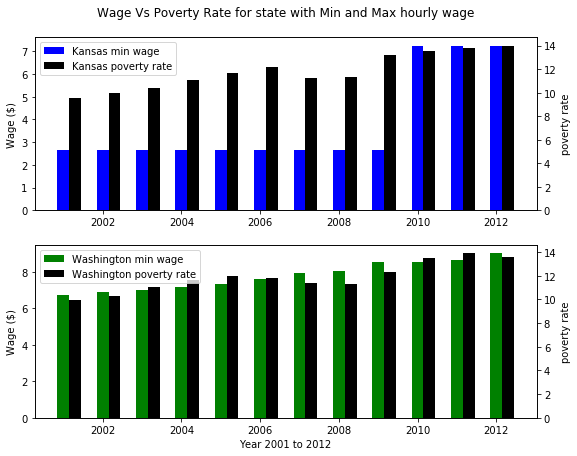

In [9]:
fig, axes= plt.subplots(nrows=2, ncols=1,figsize=(9,7))
x = state_df["Year"].unique()
w = 0.3

kan = axes[0].bar(x, Kansas_data["Minimum Wage"], width=w, color='b', align='center')
ax2 = axes[0].twinx()
kan_pvt = ax2.bar(x + w, Kansas_data["Poverty Rate"], width=w,color='black',align='center')
plt.title("Wage Vs Poverty Rate for state with Min and Max hourly wage\n")
plt.legend([kan, kan_pvt], ["Kansas min wage", "Kansas poverty rate"])
plt.xlabel("Wage ($)")
plt.ylabel("poverty rate")

was = axes[1].bar(x, Washington_data["Minimum Wage"], width=w, color='g', align='center')
ax3 = axes[1].twinx()
was_pvt = ax3.bar(x + w, Washington_data["Poverty Rate"], width=w,color='black',align='center')
plt.legend([was, was_pvt], ["Washington min wage", "Washington poverty rate"])

plt.ylabel("poverty rate")
plt.ylabel("poverty rate")
axes[1].set_xlabel("Year 2001 to 2012")
axes[1].set_ylabel("Wage ($)")
axes[0].set_ylabel("Wage ($)")
plt.savefig("Images/kan_was_wage_vs_poverty_rate.png")
plt.show()

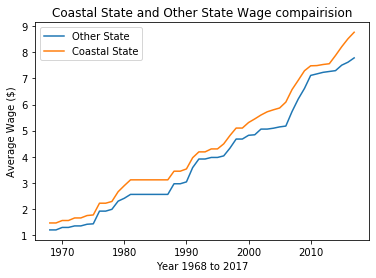

In [10]:
#Compare coastal states to middle. 
coastal_state = ['Alabama', 'Alaska', 'California', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Hawaii', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Rhode Island', 'South Carolina', 'Texas', 'U.S. Virgin Islands', 'Virginia', 'Washington']
coastal_data = []
other_state_data = []
for i in range(len(df)):
    if df.loc[i, "State"] in coastal_state:
        coastal_data.append([df.loc[i, "Year"], df.loc[i, "State"], df.loc[i, "Minimum Wage"], df.loc[i, "Latitude"], df.loc[i, "Longitude"]])
    else:
        other_state_data.append([df.loc[i, "Year"], df.loc[i, "State"], df.loc[i, "Minimum Wage"], df.loc[i, "Latitude"], df.loc[i, "Longitude"]])   

    
coastal_data_df = pd.DataFrame(coastal_data)
other_state_data_df = pd.DataFrame(other_state_data)
other_state_wage = other_state_data_df.groupby(0)[2].mean()
coastal_state_wage = coastal_data_df.groupby(0)[2].mean()

#plot the line graph
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(df["Year"].unique(), other_state_wage, label='Other State')
ax.plot(df["Year"].unique(), coastal_state_wage, label='Coastal State')
plt.xlabel("Year 1968 to 2017")
plt.ylabel("Average Wage ($)")
plt.title("Coastal State and Other State Wage compairision")
ax.legend()
# Saves an image of our chart so that we can view it in a folder
plt.savefig("Images/coastal_and_other_state_comp.png")
plt.show()

In [11]:
new_data = other_state_data_df.groupby(1).max()
co_data = coastal_data_df.groupby(1).max()
#other_state_data_df = other_state_data_df.groupby('1').mean()


In [12]:
import gmaps
# Google developer API key
from api_keys import g_key

# Store latitude and longitude in locations

#coastal_data_df = pd.DataFrame(coastal_data)
#other_state_data_df = pd.DataFrame(other_state_data)
locations_c = co_data[[3, 4]]
rating_c = co_data[2]

locations_o = new_data[[3, 4]]
rating_o = new_data[2]

# Configure gmaps
gmaps.configure(api_key=g_key)
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer1 = gmaps.heatmap_layer(locations_c, weights=rating_c, dissipating = False, max_intensity=10,point_radius=2, opacity=.9)
heat_layer2 = gmaps.heatmap_layer(locations_o, weights=rating_o, dissipating = False, max_intensity=10, point_radius=2, opacity=.9)

# Add layer
fig.add_layer(heat_layer1)
fig.add_layer(heat_layer2)
# Display figure
fig
#locations_c
plt.savefig("Images/coastal_and_other_state_heat_map.png")

<Figure size 432x288 with 0 Axes>

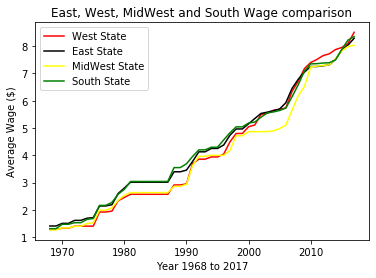

In [13]:
#Compare state areas- west, east, midwest, south
west_state = ['Arizona', 'California', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
east_state = ['Maine', 'New Hampshire', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania', 'Delaware', 'Maryland', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']
midwest_state = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'Nebraska', 'North Dakota', 'South Dakota', 'Wisconsin']
west = []
east = []
midwest = []
south = []

for i in range(len(df)):
    if df.loc[i, "State"] in east_state:
        east.append([df.loc[i, "Year"], df.loc[i, "State"], df.loc[i, "Minimum Wage"]])
    elif df.loc[i, "State"] in west_state:
        west.append([df.loc[i, "Year"], df.loc[i, "State"], df.loc[i, "Minimum Wage"]])
    elif df.loc[i, "State"] in midwest_state:
        midwest.append([df.loc[i, "Year"], df.loc[i, "State"], df.loc[i, "Minimum Wage"]])
    else:
        south.append([df.loc[i, "Year"], df.loc[i, "State"], df.loc[i, "Minimum Wage"]])   

    
west_df = pd.DataFrame(west)
east_df = pd.DataFrame(east)
midwest_df = pd.DataFrame(midwest)
south_df = pd.DataFrame(south)
west_wage = west_df.groupby(0).mean()
east_wage = east_df.groupby(0).mean()
midwest_wage = midwest_df.groupby(0).mean()
south_wage = south_df.groupby(0).mean()

#plot the line graph
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(df["Year"].unique(), west_wage, label='West State', color='red')
ax.plot(df["Year"].unique(), east_wage, label='East State', color='black')
ax.plot(df["Year"].unique(), midwest_wage, label='MidWest State', color='yellow')
ax.plot(df["Year"].unique(), south_wage, label='South State', color='green')
plt.xlabel("Year 1968 to 2017")
plt.ylabel("Average Wage ($)")
plt.title("East, West, MidWest and South Wage comparison")
ax.legend()
# Saves an image of our chart so that we can view it in a folder
plt.savefig("Images/us_regions_comp.png")
plt.show()